In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns
sns.set_theme(style="darkgrid")
import plotly.express as px

In [3]:
amd = pd.read_csv("D:/Python-R/Databases/amd.csv",parse_dates=True)

In [4]:
amd

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-31,15.200000,15.200000,14.810000,14.900000,14.900000,7395900
1,2004-01-02,15.100000,15.110000,14.770000,14.860000,14.860000,8220700
2,2004-01-05,15.050000,15.270000,15.010000,15.200000,15.200000,9156000
3,2004-01-06,15.210000,15.820000,15.050000,15.610000,15.610000,14592200
4,2004-01-07,15.780000,15.990000,15.490000,15.660000,15.660000,15329300
...,...,...,...,...,...,...,...
3948,2019-09-09,30.930000,31.180000,30.240000,30.500000,30.500000,54413200
3949,2019-09-10,30.219999,30.379999,29.770000,30.230000,30.230000,48604800
3950,2019-09-11,30.379999,30.430000,29.510000,29.760000,29.760000,50631700
3951,2019-09-12,30.080000,30.840000,29.950001,30.209999,30.209999,53618300


In [5]:
amd_train = amd.drop(["Date","Adj Close","Volume"],axis = 1)

In [6]:
for i in amd_train.columns :
    µ = amd_train[i].mean()
    sigma = amd_train[i].std()
    amd_train[i] = amd_train[i].apply(lambda x : (x - µ) / sigma)

In [7]:
amd_plot_train = amd_train.copy()
amd_plot_train["Date"] = amd.Date

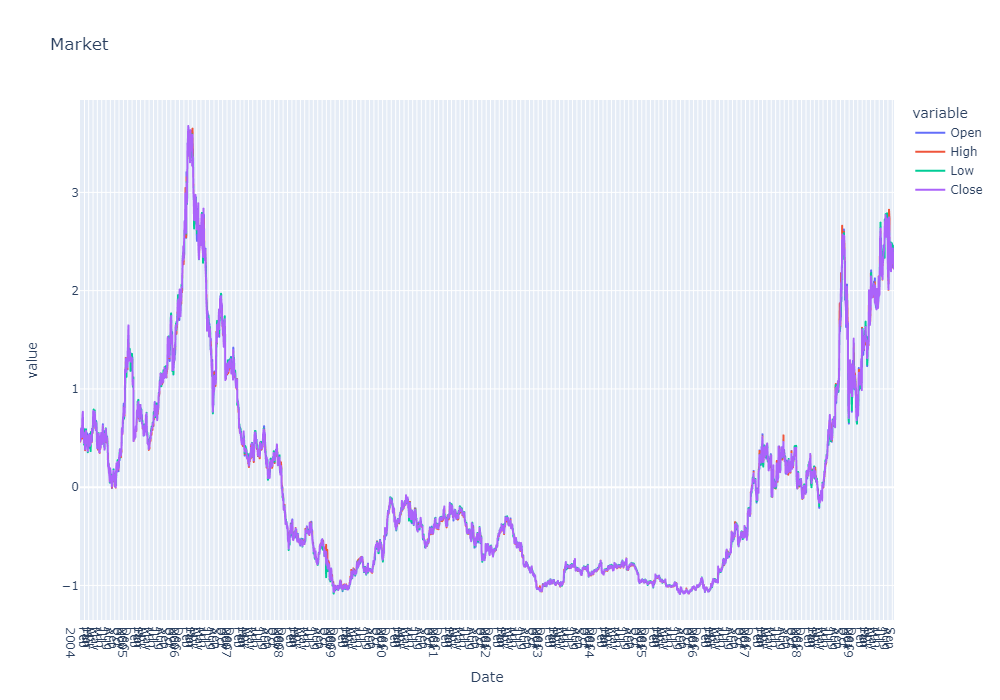

In [8]:
from IPython.display import Image
fig = px.line(amd_plot_train, x="Date", y=amd_plot_train.columns,
              hover_data={"Date": "|%B %d, %Y"},
              title='Market')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.update_layout(height = 600,width = 900)
image_bytes = fig.to_image(format='png',  width=1000, height=700, scale=1) 

Image(image_bytes)

In [9]:
h = 1
past = 14

X_train = []
Y_train = []

for i in range(past,len(amd_train) - 1 + 1):
    X_train.append(amd_train.iloc[i-past:i,:])
    Y_train.append(amd_train.iloc[i+h-1:i+h,0])

In [10]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [11]:
print(f'shape x : {X_train.shape}\nshape y : {Y_train.shape}')

shape x : (3939, 14, 4)
shape y : (3939, 1)


In [12]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [13]:
model = Sequential()
model.add(LSTM(128,activation="relu",input_shape = (14,4),return_sequences=True))
model.add(LSTM(64,activation="relu"))
model.add(Dropout(.3))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 128)           68096     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 117569 (459.25 KB)
Trainable params: 117569 (459.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
99/99 [==============================] - 6s 20ms/step - loss: 0.0822 - val_loss: 0.0239
Epoch 2/50
99/99 [==============================] - 2s 15ms/step - loss: 0.0328 - val_loss: 0.0196
Epoch 3/50
99/99 [==============================] - 2s 17ms/step - loss: 0.0322 - val_loss: 0.0300
Epoch 4/50
99/99 [==============================] - 2s 15ms/step - loss: 0.0326 - val_loss: 0.0201
Epoch 5/50
99/99 [==============================] - 2s 16ms/step - loss: 0.0289 - val_loss: 0.0176
Epoch 6/50
99/99 [==============================] - 2s 15ms/step - loss: 0.0309 - val_loss: 0.0175
Epoch 7/50
99/99 [==============================] - 1s 15ms/step - loss: 0.0257 - val_loss: 0.0210
Epoch 8/50
99/99 [==============================] - 2s 16ms/step - loss: 0.0278 - val_loss: 0.0208
Epoch 9/50
99/99 [==============================] - 2s 16ms/step - loss: 0.0276 - val_loss: 0.0128
Epoch 10/50
99/99 [==============================] - 2s 16ms/step - loss: 0.0268 - val_loss: 0.0276
Epoch 11/

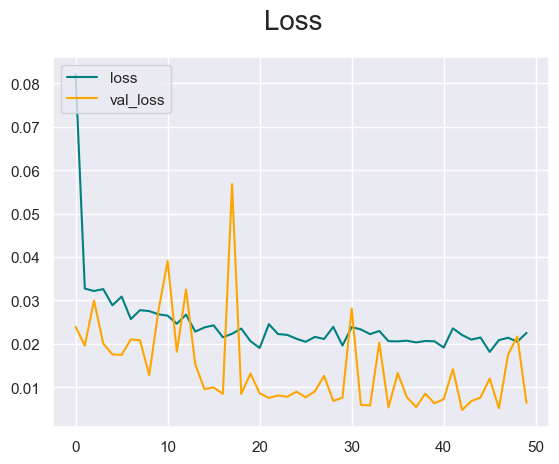

In [16]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [17]:
past = 90
days_pred=90  

predict_period_dates = pd.date_range(list(amd.Date)[-past], periods=days_pred, freq='1d').tolist()
print(predict_period_dates)


[Timestamp('2019-05-08 00:00:00'), Timestamp('2019-05-09 00:00:00'), Timestamp('2019-05-10 00:00:00'), Timestamp('2019-05-11 00:00:00'), Timestamp('2019-05-12 00:00:00'), Timestamp('2019-05-13 00:00:00'), Timestamp('2019-05-14 00:00:00'), Timestamp('2019-05-15 00:00:00'), Timestamp('2019-05-16 00:00:00'), Timestamp('2019-05-17 00:00:00'), Timestamp('2019-05-18 00:00:00'), Timestamp('2019-05-19 00:00:00'), Timestamp('2019-05-20 00:00:00'), Timestamp('2019-05-21 00:00:00'), Timestamp('2019-05-22 00:00:00'), Timestamp('2019-05-23 00:00:00'), Timestamp('2019-05-24 00:00:00'), Timestamp('2019-05-25 00:00:00'), Timestamp('2019-05-26 00:00:00'), Timestamp('2019-05-27 00:00:00'), Timestamp('2019-05-28 00:00:00'), Timestamp('2019-05-29 00:00:00'), Timestamp('2019-05-30 00:00:00'), Timestamp('2019-05-31 00:00:00'), Timestamp('2019-06-01 00:00:00'), Timestamp('2019-06-02 00:00:00'), Timestamp('2019-06-03 00:00:00'), Timestamp('2019-06-04 00:00:00'), Timestamp('2019-06-05 00:00:00'), Timestamp('20

In [18]:
prediction = model.predict(X_train[-days_pred:])

3/3 [==============================] - 0s 13ms/step


In [19]:
preds = prediction.squeeze(1).tolist()

In [20]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':preds})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [21]:
df_forecast

,Date,Open
0,2019-05-08,1.820407
1,2019-05-09,1.845314
2,2019-05-10,1.838368
3,2019-05-11,1.925221
4,2019-05-12,1.786434
...,...,...
85,2019-08-01,2.274007
86,2019-08-02,2.270691
87,2019-08-03,2.206349
88,2019-08-04,2.187160


In [22]:
original = pd.DataFrame({"Open":list(amd_train['Open'])[-91:]})
original

,Open
0,1.919257
1,1.826406
2,1.860491
3,1.899277
4,1.893400
...,...
86,2.357654
87,2.274206
88,2.293011
89,2.257751


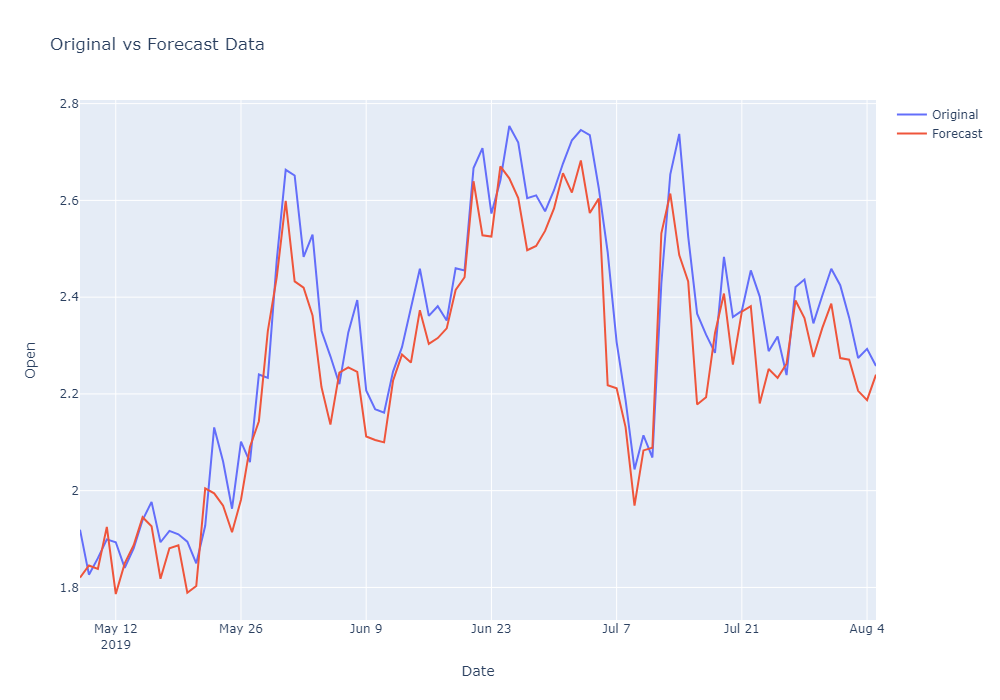

In [23]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatter(x=df_forecast['Date'], y=original['Open'], mode='lines', name='Original'))

fig.add_trace(go.Scatter(x=df_forecast['Date'], y=df_forecast['Open'], mode='lines', name='Forecast'))

fig.update_layout(title='Original vs Forecast Data',
                  xaxis_title='Date',
                  yaxis_title='Open',width = 800)

image_bytes = fig.to_image(format='png',  width=1000, height=700, scale=1) 

Image(image_bytes)